In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
def binarizer(input_img, v_blocks, h_blocks):
    # This programs splits an image into 'v_blocks' blocks in vertical direction
    # and into 'h_blocks' blocks in horizontal direction. All the blocks are equal except the last ones.

    height, width = input_img.shape # size of the input image
    output_img = np.nan # output image
    temp = np.nan
    
    merge = lambda tmp, aim, n: aim if np.isnan(tmp).any() else np.concatenate((tmp, aim), axis=n)
    
    for row in range(v_blocks):
        # horizontal range
        row_start = row * np.floor(height / v_blocks)
        row_end = height if row == v_blocks - 1 else (row + 1) * np.floor(height / v_blocks)
            
        for col in range(h_blocks):
            # horizontal range
            col_start = col  * np.floor(width / h_blocks)
            col_end = width if col == width - 1 else (col + 1) * np.floor(width / h_blocks)

            _, img_bin = cv2.threshold(input_img[int(row_start):int(row_end), int(col_start):int(col_end)], 0, 255, cv2.THRESH_OTSU)
            temp = merge(temp, img_bin, 1)
        output_img = merge(output_img, temp, 0)
        temp = np.nan
    
    return output_img

In [3]:
def plot_binarized(img_path, v_blocks, h_blocks):
    im = cv2.imread(img_path, 0)
    thresh, im_bin = cv2.threshold(im, 0, 255, cv2.THRESH_OTSU) # threshold for binarization

    fig1, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes[0][0].imshow(im, cmap='gray')
    axes[0][0].set_title('Original image')
    axes[0][1].hist(im.ravel(), 256, [0,256])
    axes[0][1].axvline(np.around(thresh), color='r') # threshold marker
    axes[0][1].set_title('Image histogram\nRed line - threshold ({})'.format(thresh))

    axes[1][0].imshow(im_bin, cmap='gray')
    axes[1][0].set_title('Whole image binarization')

    # binarizing using blocks
    im_bin_block = binarizer(im, v_blocks, h_blocks)
    axes[1][1].imshow(im_bin_block, cmap='gray')
    axes[1][1].set_title('Block binarization: {} $\\times$ {} blocks'.format(v_blocks, h_blocks))
    plt.show()

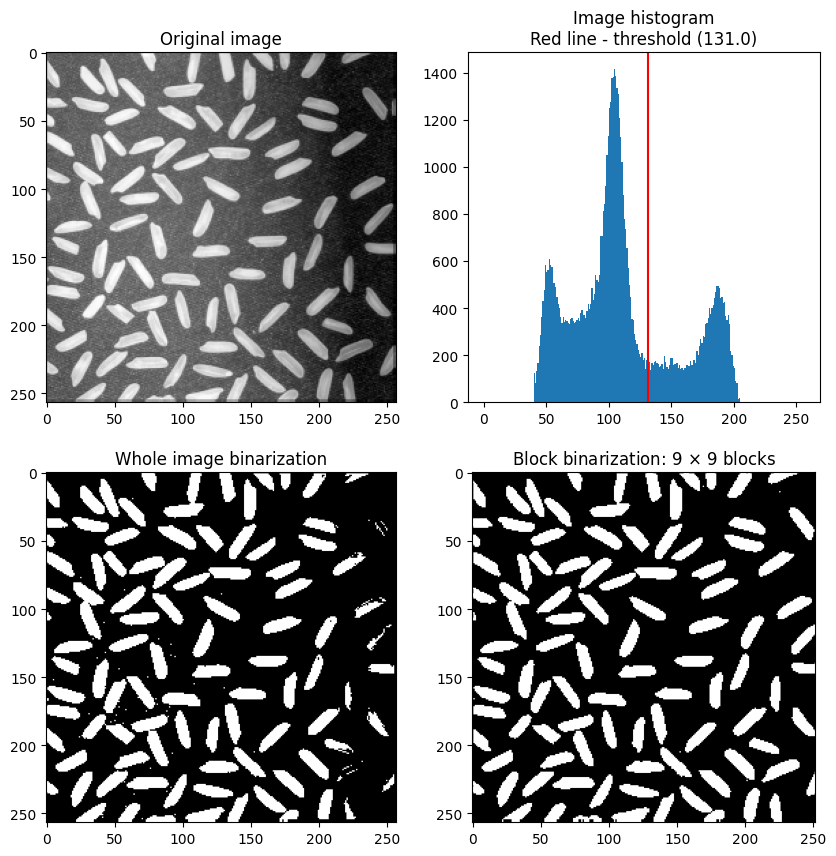

In [4]:
# Loading the 1st image
plot_binarized(img_path='image_1.tif', v_blocks=9, h_blocks=9)

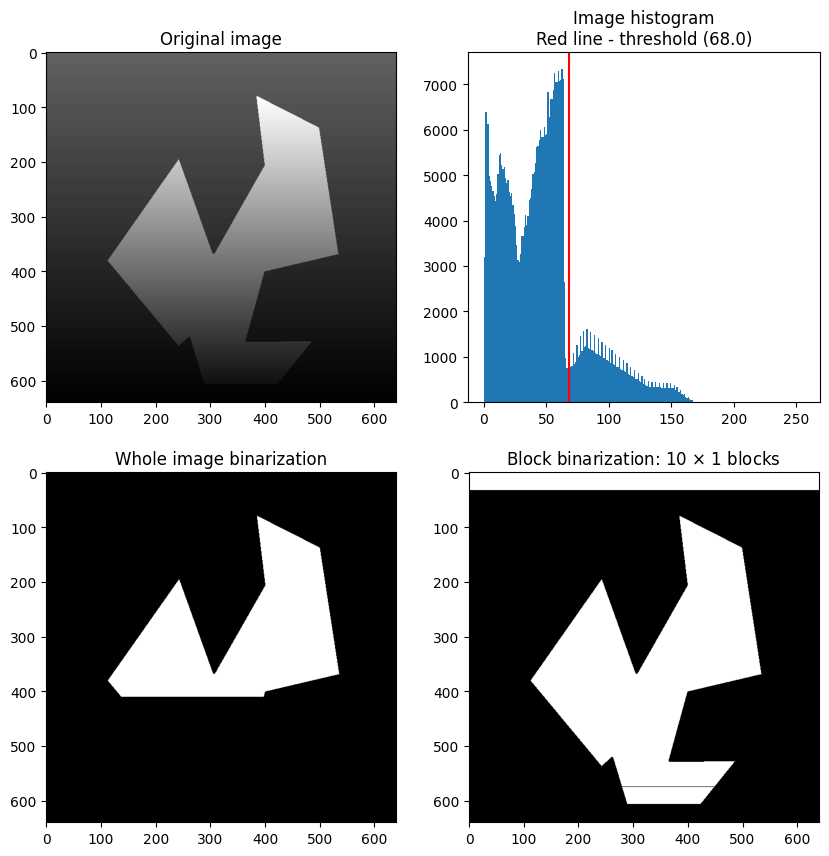

In [5]:
# Loading the 2nd image
plot_binarized(img_path='image_2.png', v_blocks=  10, h_blocks=1)